#Versão --Simplificada-- desconsiderar

In [4]:
import pandas as pd


In [7]:
#importando a base de dados
df_closestock = pd.read_csv('https://raw.githubusercontent.com/diogobrasil/analises-tcc-cripto/refs/heads/main/main/datasets/b3_dados/processed/acoes_concat.csv')

df_closestock['Date'] = pd.to_datetime(df_closestock['Date'])


In [10]:
# lista com o nome das ações
ls_stock = list(df_closestock.columns[1:])



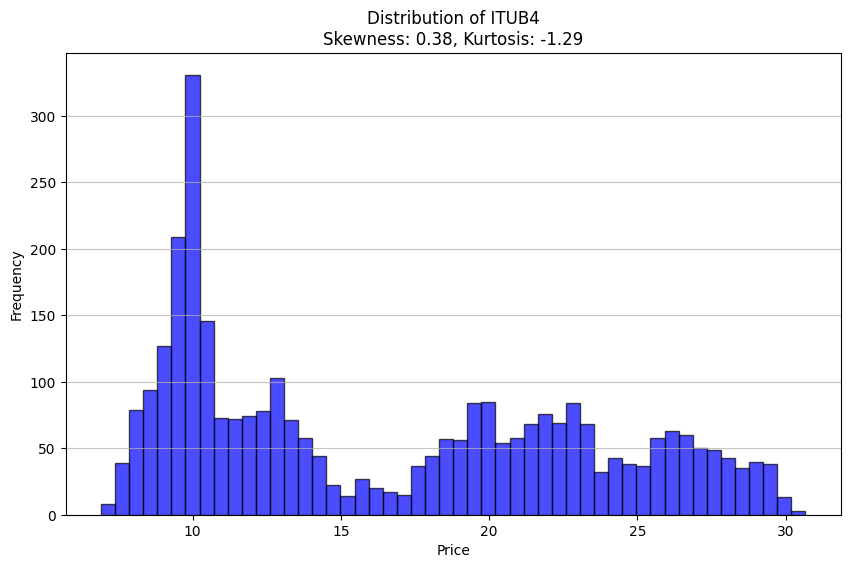

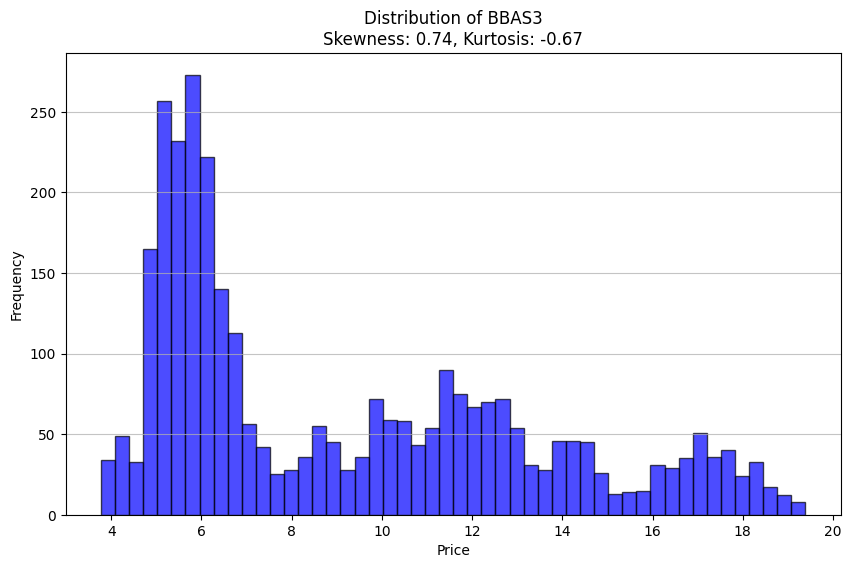

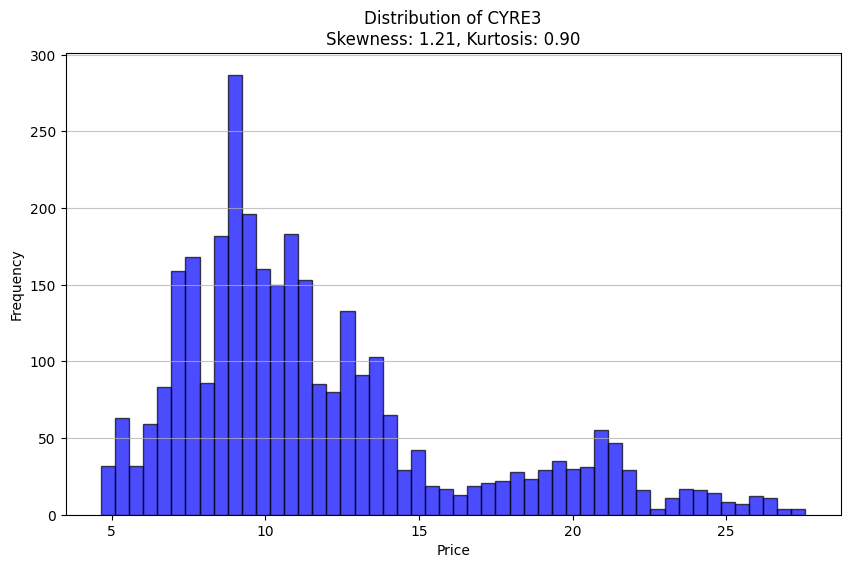

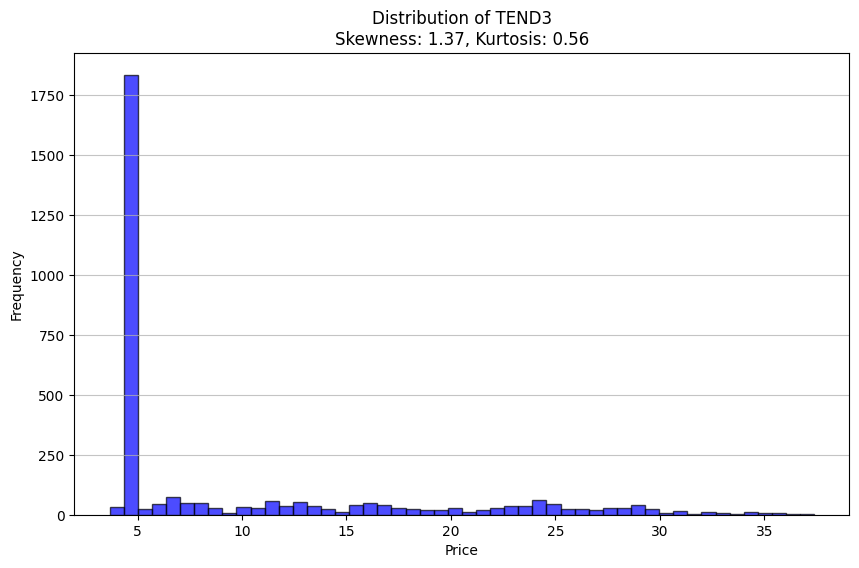

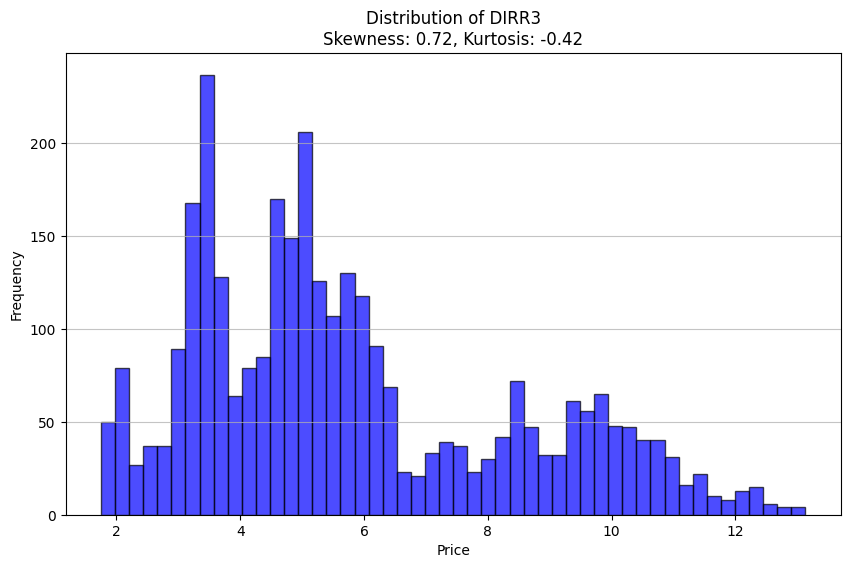

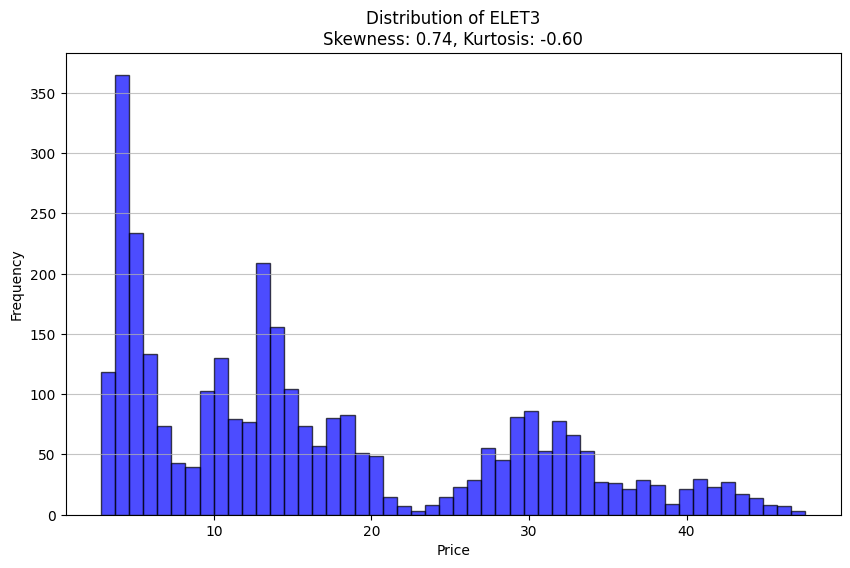

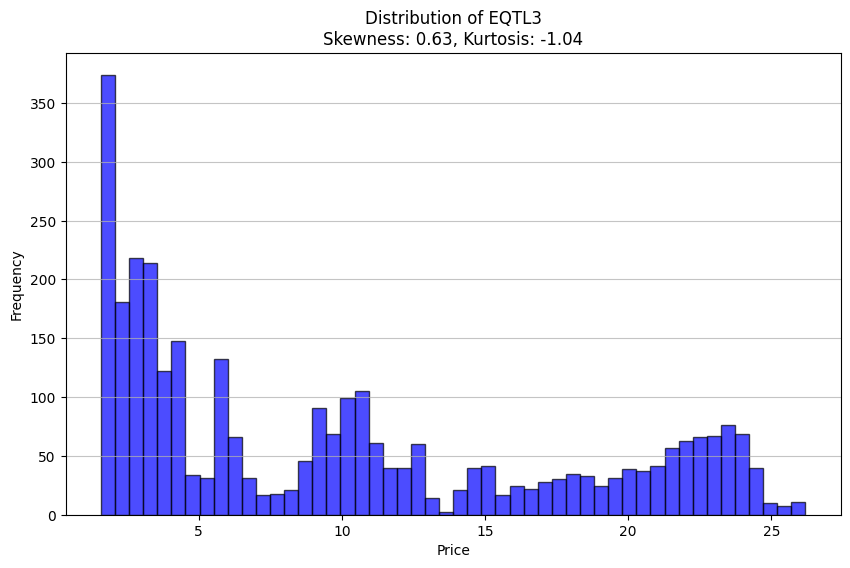

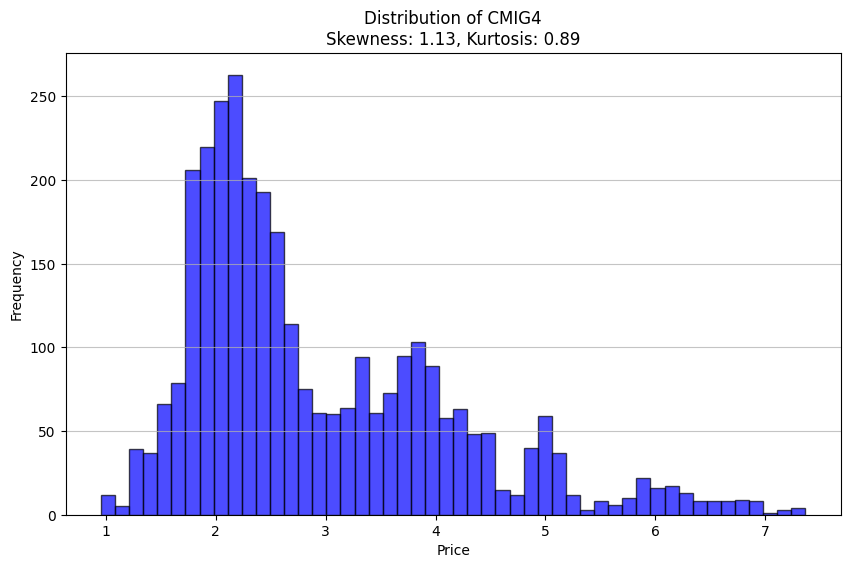

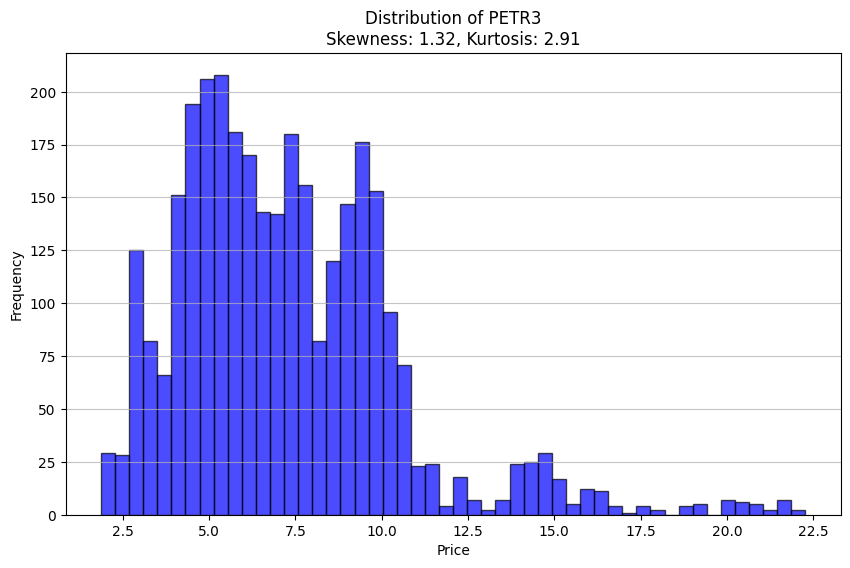

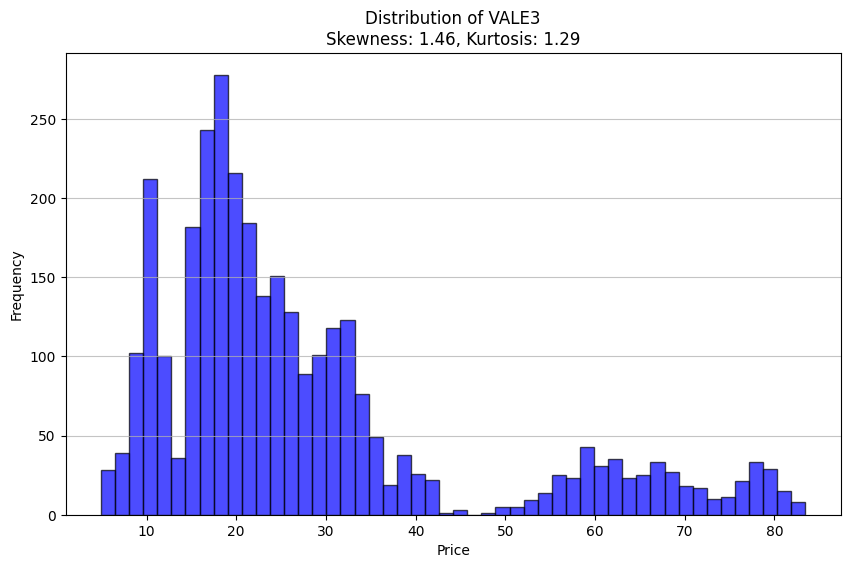

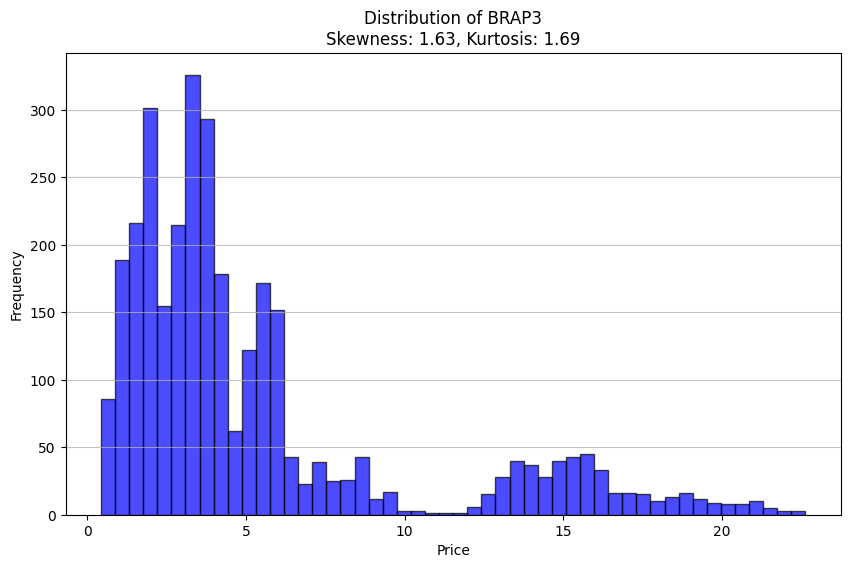

In [14]:
# Iterar sobre cada ação para plotar o gráfico de distribuição
for stock in ls_stock:
    # Selecionar os dados da ação atual
    data = df_closestock[["Date", stock]].dropna()

    # Calcular assimetria e curtose
    stock_skewness = skew(data[stock])
    stock_kurtosis = kurtosis(data[stock])

    # Criar o gráfico de distribuição
    plt.figure(figsize=(10, 6))
    plt.hist(data[stock], bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of {stock}\nSkewness: {stock_skewness:.2f}, Kurtosis: {stock_kurtosis:.2f}")
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    # Mostrar o gráfico
    plt.show()


# Fazendo o Processo Com o Bokeh, de forma mais detalhada



* pandas: Usado para manipulação e análise de dados tabulares. Aqui, ele será utilizado para carregar e organizar os dados do CSV.

* bokeh.plotting.figure: Ferramenta principal do Bokeh para criar gráficos interativos.

* bokeh.plotting.show: Mostra os gráficos criados.

* bokeh.plotting.output_notebook: Garante que os gráficos sejam exibidos diretamente no notebook.

* bokeh.layouts.gridplot: Permite organizar múltiplos gráficos em uma grade.

* scipy.stats.kurtosis e scipy.stats.skew: Funções que calculam a curtose e a assimetria de uma distribuição.

* numpy: Biblioteca para cálculos numéricos avançados.
Aqui, ela ajuda a criar intervalos de valores para as distribuições normais.

pandas: Usado para manipulação e análise de dados tabulares. Aqui, ele será utilizado para carregar e organizar os dados do CSV.

bokeh.plotting.figure: Ferramenta principal do Bokeh para criar gráficos interativos.

bokeh.plotting.show: Mostra os gráficos criados.

bokeh.plotting.output_notebook: Garante que os gráficos sejam exibidos diretamente no notebook.

bokeh.layouts.gridplot: Permite organizar múltiplos gráficos em uma grade.

scipy.stats.kurtosis e scipy.stats.skew: Funções que calculam a curtose e a assimetria de uma distribuição.

numpy: Biblioteca para cálculos numéricos avançados.
Aqui, ela ajuda a criar intervalos de valores para as distribuições normais.

In [15]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from scipy.stats import kurtosis, skew
import numpy as np

Habilita a saída no notebook

In [16]:
# Habilitar saída no notebook, remover para abrir os gráficos no chrome ou afins
output_notebook()


## Importando a base de dados e Convertendo a coluna de data para datetime



In [17]:
# Importando a base de dados
df_closestock = pd.read_csv('https://raw.githubusercontent.com/diogobrasil/analises-tcc-cripto/refs/heads/main/main/datasets/b3_dados/processed/acoes_concat.csv')

# Convertendo a coluna de data para datetime
df_closestock['Date'] = pd.to_datetime(df_closestock['Date'])

##Lista com o nome das ações

In [18]:
# Lista com o nome das ações
ls_stock = list(df_closestock.columns[1:])

# Lista para armazenar os gráficos
plots = []


##Geração dos Gráficos

In [21]:
# Iterar sobre cada ação para criar gráficos interativos
for stock in ls_stock:
    # Selecionar os dados da ação atual
    data = df_closestock[["Date", stock]].dropna()

    # Calcular assimetria e curtose
    stock_skewness = skew(data[stock])
    stock_kurtosis = kurtosis(data[stock])

    # Parâmetros da distribuição normal
    mean, std = data[stock].mean(), data[stock].std()
    x = np.linspace(data[stock].min(), data[stock].max(), 1000)
    normal_pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

    # Criar figura do Bokeh
    p = figure(title=f"Distribution of {stock} \n Skewness: {stock_skewness:.2f}, Kurtosis: {stock_kurtosis:.2f}",
           x_axis_label='Price', y_axis_label='Frequency',
           width=600, height=400)  # Substituir plot_width e plot_height


    # Histograma
    hist, edges = np.histogram(data[stock], bins=50, density=True)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="blue", line_color="black", alpha=0.7)

    # Curva normal
    p.line(x, normal_pdf, line_width=2, color="red", legend_label="Normal Distribution")

    # Configurações do gráfico
    p.legend.location = "top_right"
    p.legend.title = "Legend"
    p.grid.grid_line_alpha = 0.3

    # Adicionar gráfico à lista
    plots.append(p)

# Layout em grid
grid = gridplot([plots[i:i+2] for i in range(0, len(plots), 2)])

# Mostrar gráficos
show(grid)